# Self Learning Tutorial
## Depression Entity Embedding Investigation
In this tutorial I will investigate the entity embeddings in notes related to depression and those without.

An associated slide deck is avalible at https://docs.google.com/presentation/d/e/2PACX-1vSocFpdRf1IAOYNeYKulxqHV9CtD7o8ryWVkoamuCWsNHy4pITeaGzhhWCpEueedCAjguZTmI7lzwUN/pub?start=false&loop=false&delayms=3000

# Creating the datasets
First I need to create datasets for notes related to depression and those not related to depression. I started by finding all icd-9 codes related to depression in the MIMIC-III database.

In [1]:
import pandas as pd

depression_icd9_df = pd.read_csv("sql/depression_icd9_output.csv")
depression_icd9_df

,row_id,icd9_code,short_title,long_title
0,2572,29634,Rec depr psych-psychotic,"Major depressive affective disorder, recurrent..."
1,2573,29635,Recur depr psyc-part rem,"Major depressive affective disorder, recurrent..."
2,2574,29636,Recur depr psyc-full rem,"Major depressive affective disorder, recurrent..."
3,2599,29682,Atypical depressive dis,Atypical depressive disorder
4,2609,2980,React depress psychosis,Depressive type psychosis
5,2653,30112,Chr depressive person,Chronic depressive personality disorder
6,2982,3091,Prolong depressive react,Prolonged depressive reaction
7,3002,311,Depressive disorder NEC,"Depressive disorder, not elsewhere classified"
8,3217,29013,Presenile depression,Presenile dementia with depressive features
9,3219,29021,Senile depressive,Senile dementia with depressive features


I used the icd9 codes related to depression to then find all icd diagnoses events related to depression.

In [2]:
depression_events_df = pd.read_csv("sql/depression_events_output.csv.gz")
depression_events_df

,subject_id,hadm_id,seq_num,icd9_code,short_title,long_title
0,135,192180,4,311,Depressive disorder NEC,"Depressive disorder, not elsewhere classified"
1,67,155252,5,311,Depressive disorder NEC,"Depressive disorder, not elsewhere classified"
2,67,186474,6,311,Depressive disorder NEC,"Depressive disorder, not elsewhere classified"
3,17,161087,5,311,Depressive disorder NEC,"Depressive disorder, not elsewhere classified"
4,18,188822,3,29633,Recur depr psych-severe,"Major depressive affective disorder, recurrent..."
...,...,...,...,...,...,...
3740,96908,138027,15,311,Depressive disorder NEC,"Depressive disorder, not elsewhere classified"
3741,97151,133020,6,311,Depressive disorder NEC,"Depressive disorder, not elsewhere classified"
3742,97152,184093,6,311,Depressive disorder NEC,"Depressive disorder, not elsewhere classified"
3743,97476,189690,7,311,Depressive disorder NEC,"Depressive disorder, not elsewhere classified"


I then used the hadm ids to partition the notes into those related to depression and those not, then took a sample of 10,000 notes from each to form two datasets.

In [3]:
# Dataset for notes related to depression.
depression_notes_output_df = pd.read_csv("sql/depression_notes_output.csv.gz", compression="gzip", low_memory=False)
depression_notes_output_df

,text
0,[**2138-9-19**] 5:36 AM\n CHEST (PORTABLE AP) ...
1,[**2138-9-14**] 9:37 AM\n CHEST PORT. LINE PLA...
2,[**2138-9-14**] 10:52 AM\n CTA CHEST W&W/O C&R...
3,[**2138-9-11**] 1:44 PM\n CHEST (PORTABLE AP);...
4,[**2138-9-16**] 4:22 AM\n CHEST (PORTABLE AP) ...
...,...
9995,[**2166-6-8**] 2:59 AM\n CT HEAD W/O CONTRAST ...
9996,[**2166-6-7**] 11:01 PM\n CT ABD & PELVIS WITH...
9997,[**2166-6-7**] 11:13 PM\n CHEST (PA & LAT) ...
9998,GALLBLADDER SCAN ...


In [4]:
# Dataset for notes not related to depression.
non_depression_notes_output_df = pd.read_csv("sql/non_depression_notes_output.csv.gz", compression="gzip", low_memory=False)
non_depression_notes_output_df

,text
0,Admission Date: [**2130-12-17**] Dischar...
1,Admission Date: [**2188-12-12**] Discha...
2,Admission Date: [**2124-11-8**] Discharge...
3,Admission Date: [**2179-11-19**] Discharg...
4,Admission Date: [**2105-12-22**] Discha...
...,...
9995,Rhythm uncertain - group beating pattern prese...
9996,Sinus rhythm. Anteroseptal myocardial infarct...
9997,Sinus rhythm. Ventricular ectopy. There are ...
9998,Sinus rhythm. There are Q waves in the anteri...


# 2. TSNE Visualization
Next I will visualize the embeddings from the two datasets using TSNE. This will provide a lower dimensional representation of the similarity between entities in the notes. 

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from collections import Counter

# Helper function defined in the lectures for cleaning the text
def clean_text(text):
    # Tokenize the text into words
    words = text.split()

    # Remove special characters and convert to lowercase
    clean_words = [word.lower() for word in words if word.isalnum()]

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in clean_words if word not in stop_words]

    # Remove words with less than 4 characters and numbers. This is done in order to reduce noisy data and numbers dont contribute much in any NLP applications
    filtered_words = [word for word in filtered_words if len(word) >= 4 and not word.isdigit()]

    # Remove duplicate words
    cleaned_text = " ".join(dict.fromkeys(filtered_words))  # This is useful while plotting t-SNE plots

    return cleaned_text


def top_k_tokens(notes, top_k=100):
    input_text = clean_text('. '.join(notes))
    input_tokens = [t[0] for t in Counter(input_text.split()).most_common(top_k)]
    return input_tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/paulplant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
top_depression_tokens = top_k_tokens(depression_notes_output_df['text'])
top_not_depression_tokens = top_k_tokens(non_depression_notes_output_df['text'])

depression_tokens_set = set(top_depression_tokens)
not_depression_tokens_set = set(top_not_depression_tokens)

print("depression only tokens: ", sorted(depression_tokens_set - not_depression_tokens_set), " \n")
print("not depression only tokens: ", sorted(not_depression_tokens_set - depression_tokens_set), "\n")
print("common tokens: ", sorted(depression_tokens_set & not_depression_tokens_set), "\n")

depression only tokens:  ['access', 'admitting', 'also', 'amount', 'apical', 'appearance', 'appears', 'appreciable', 'becomes', 'bilobectomy', 'bronch', 'cancer', 'change', 'chest', 'clip', 'coiled', 'communicated', 'compared', 'confluent', 'contraindications', 'contrast', 'copd', 'correct', 'course', 'currently', 'decrease', 'desaturations', 'diagnosed', 'dobbhoff', 'effusion', 'endotracheal', 'evaluate', 'evaluation', 'extensive', 'female', 'final', 'findings', 'glass', 'ground', 'hemorrhage', 'identifier', 'images', 'improved', 'includes', 'increasing', 'initial', 'interval', 'intubation', 'jbre', 'line', 'lower', 'lung', 'mdct', 'moderate', 'multifocal', 'nasogastric', 'newly', 'number', 'nurse', 'opacity', 'optiray', 'overall', 'parenchymal', 'physician', 'pleural', 'pneumothorax', 'portable', 'position', 'previous', 'prior', 'projects', 'proximal', 'pulmonary', 'radiograph', 'reason', 'recently', 'relatively', 'report', 'requirements', 'requiring', 'shows', 'slight', 'subclavian'

I took a look at the most common words in each to verify that there is a difference within these datasets. In particular 'depression' and similar mood related words to not appear at all in the top 100 tokens.

In [7]:
import numpy as np
import string
import matplotlib.pyplot as plt
from transformers import AutoModel, AutoTokenizer
import torch
from cuml.manifold import TSNE # GPU accelerated TSNE
from tqdm import tqdm

# Load the BERT model and tokenizer
clinical_model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
clinical_tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
clinical_model.eval()



# Based off of code for visualizing TSNE from the lectures
def tsne_notes_visualization(input_tokens, title, model=clinical_model, tokenizer=clinical_tokenizer):
    word_embs = []
    
    for token in tqdm(input_tokens, desc='Extracting word embeddings'):
        # Check if the token is a valid word
        if token not in string.punctuation:
            # Encode the token using the BERT model
            inputs = tokenizer(token, return_tensors="pt")
            with torch.no_grad():
                outputs = model(**inputs)
            token_emb = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
            word_embs.append(token_emb)
    
    # Perform t-SNE dimensionality reduction
    tsne_model = TSNE(n_components=2, perplexity=10, random_state=42)
    word_embs_2d = tsne_model.fit_transform(np.array(word_embs))

    # Create a scatter plot of the word embeddings in 2D space
    plt.figure(figsize=(20, 20))
    for i in tqdm(range(len(word_embs_2d)), desc='Plotting TSNE'):
        plt.scatter(word_embs_2d[i, 0], word_embs_2d[i, 1])
        plt.annotate(input_tokens[i], (word_embs_2d[i, 0], word_embs_2d[i, 1]))
    
    plt.title(f"t-SNE Visualization of {title} Embeddings")
    plt.show()

For entity extraction I use 'Bio_ClinicalBERT' to extract entities relevant to our medical corpus.
To speed up the process I am using TSNE from rapids.ai (https://docs.rapids.ai/api/cuml/stable/api/#cuml.TSNE). This is a GPU accelerated implementation of TSNE which is faster than the CPU only implementation from sklearn.

Extracting word embeddings: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.70it/s]
/home/paulplant/.conda/envs/ai-in-healthcare/lib/python3.11/site-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)
Plotting TSNE: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1021.74it/s]


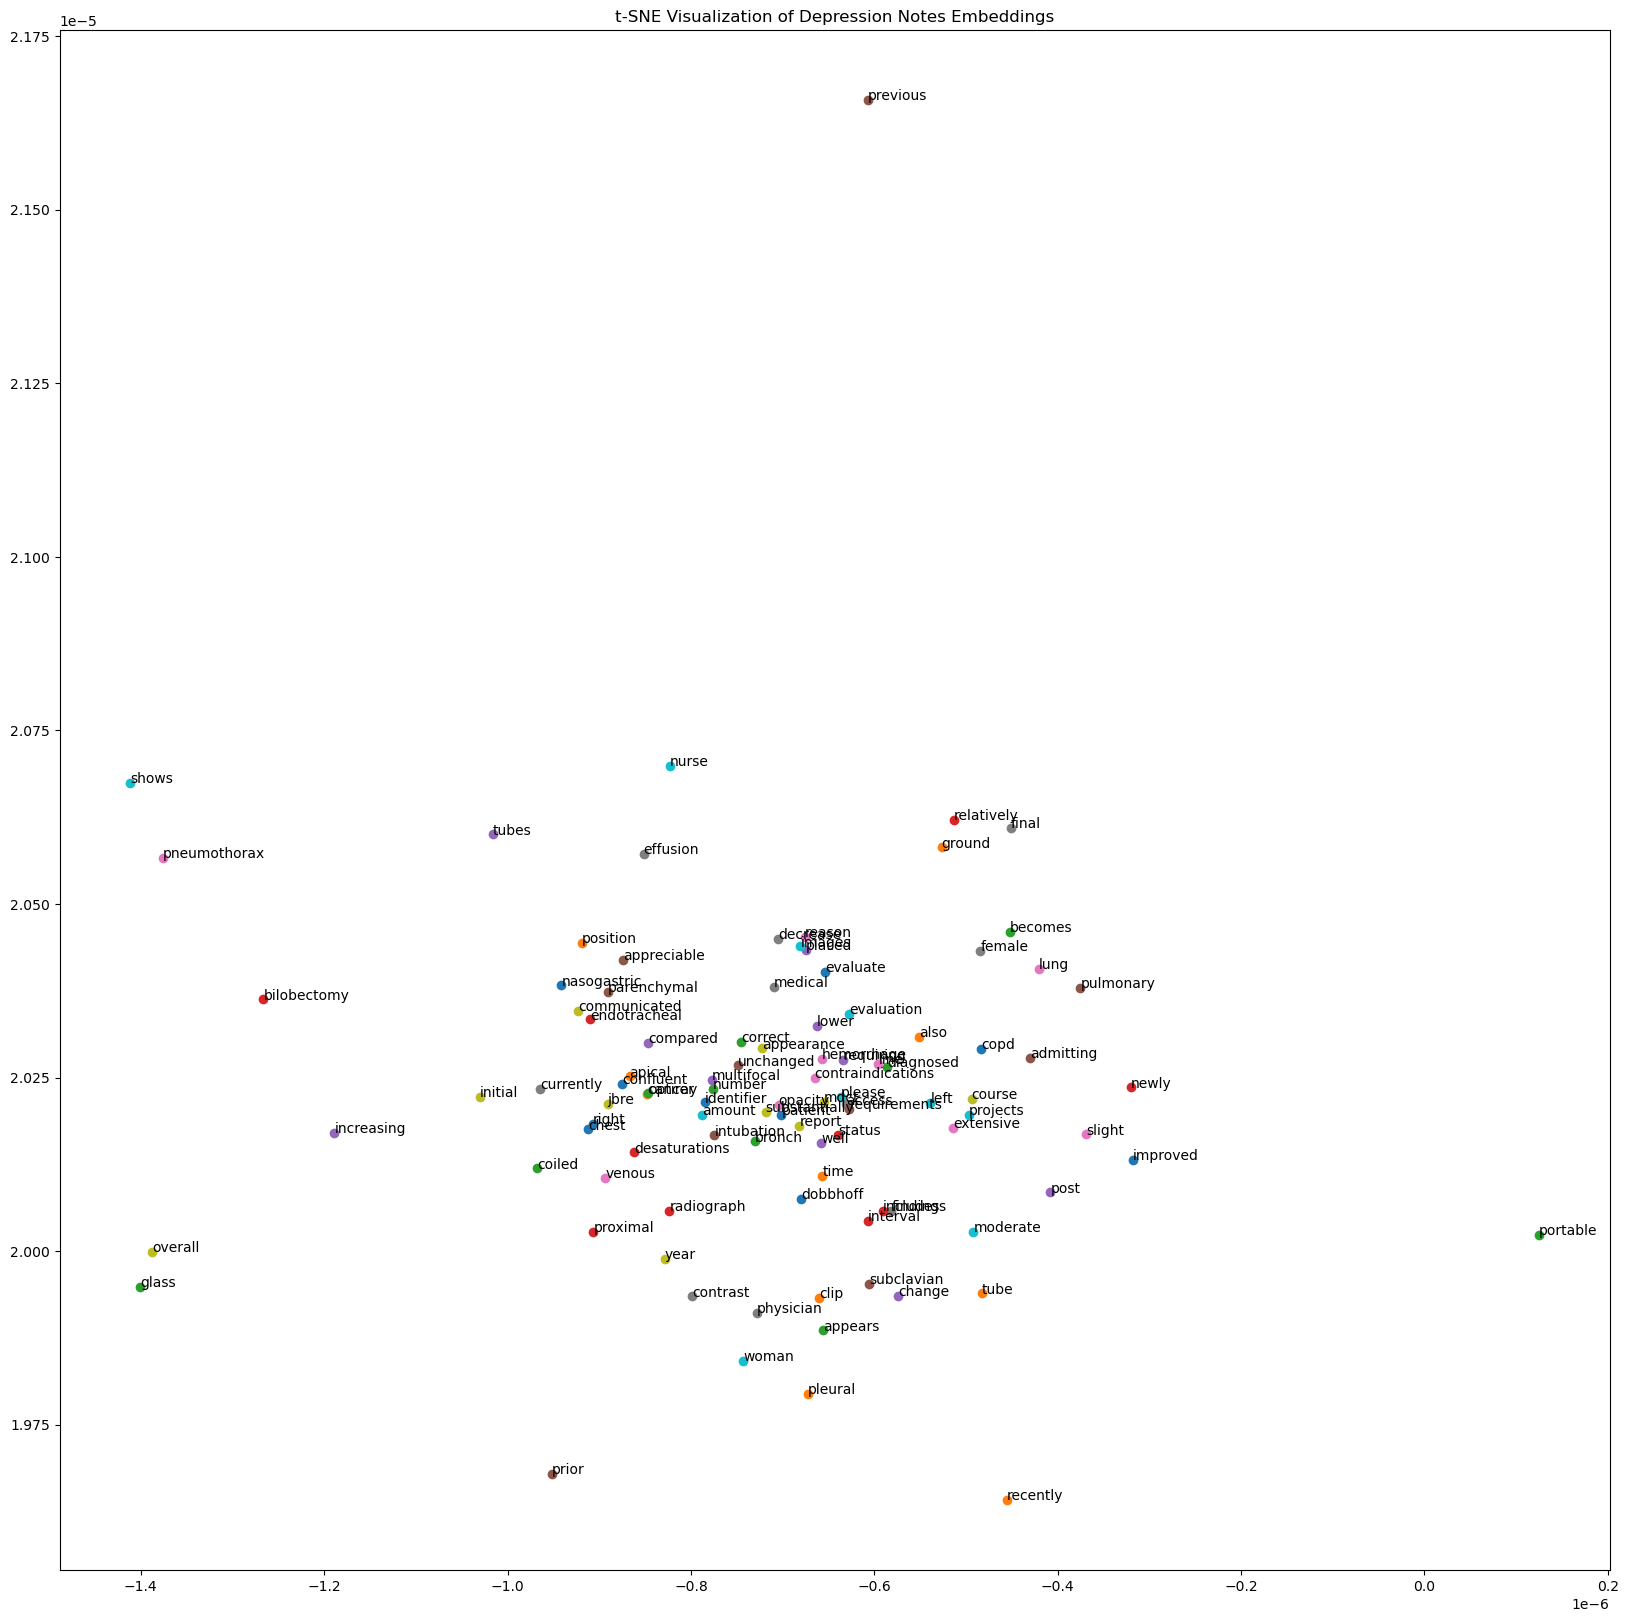

In [8]:
tsne_notes_visualization(top_depression_tokens, 'Depression Notes')

Plotting TSNE: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1036.52it/s]


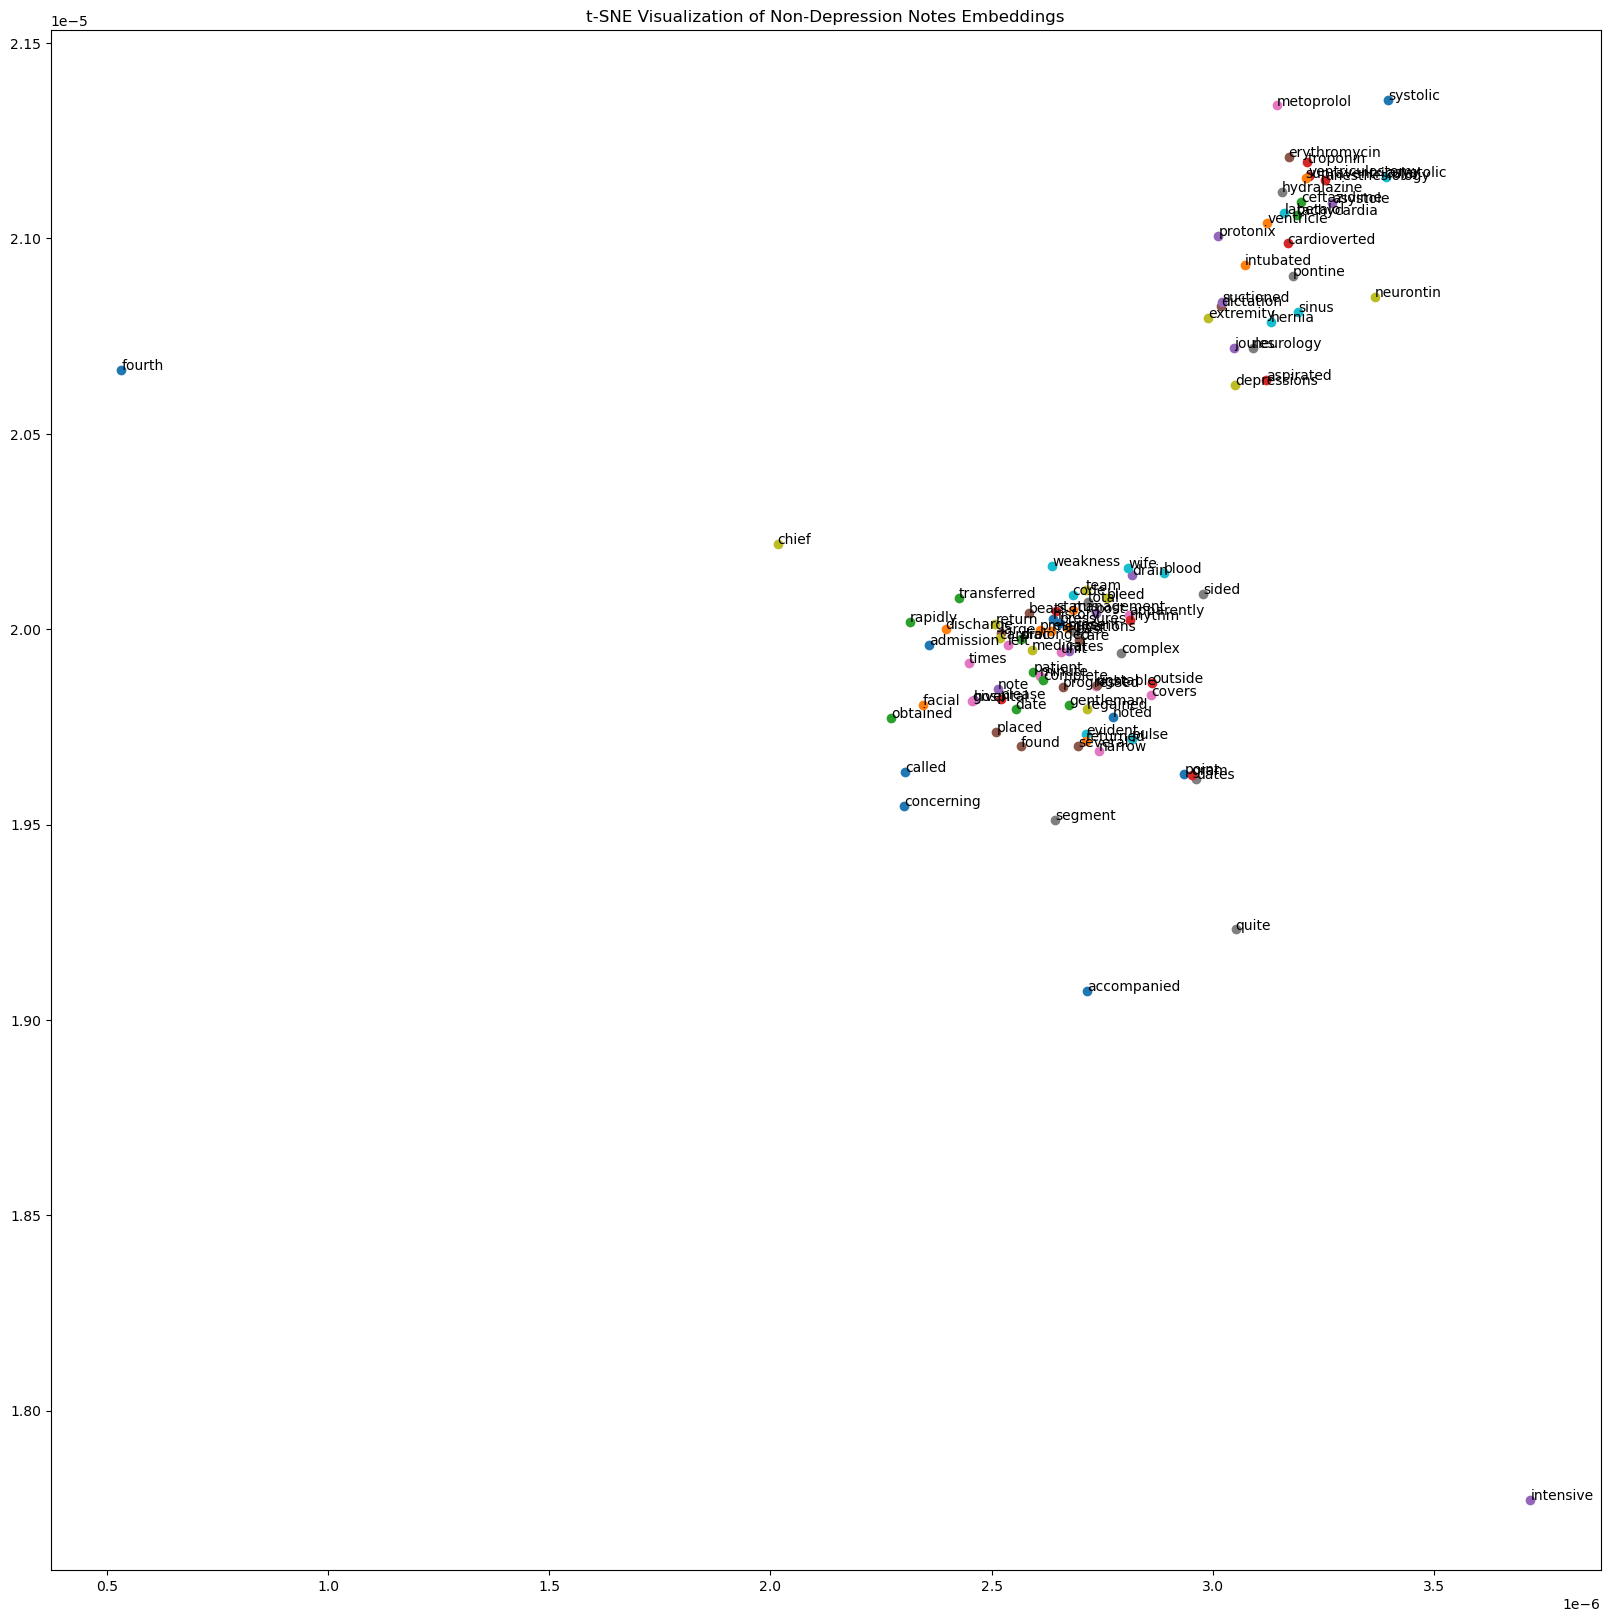

In [9]:
tsne_notes_visualization(top_not_depression_tokens, 'Non-Depression Notes')

# 3. Classification
Lastly, I am going to try training a classifier using these embeddings to predict depression based on the notes.

In [10]:
from datasets import Dataset
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

# Add label class labels to our samples and concatenate the datasets
depression_notes_output_df['label'] = 1
non_depression_notes_output_df['label'] = 0

# Create the train and test sets
dataset = Dataset.from_pandas(pd.concat([depression_notes_output_df, non_depression_notes_output_df], ignore_index=True))
train_test_split = dataset.train_test_split(test_size=0.2)
test_valid_split = train_test_split['test'].train_test_split(test_size=0.5)

# Tokenize the data
def tokenize(examples, tokenizer=clinical_tokenizer):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

train_data = train_test_split["train"].map(tokenize, batched=True)
test_data = test_valid_split["train"].map(tokenize, batched=True)
valid_data = test_valid_split["test"].map(tokenize, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

First we label the two datasets merge them, and split it into a training and test set.

In [11]:
# Use hugging face classifer for binary classification
clf_model = AutoModelForSequenceClassification.from_pretrained("emilyalsentzer/Bio_ClinicalBERT", num_labels=2)

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
)

# Train the classifier
trainer = Trainer(
    model=clf_model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/paulplant/.conda/envs/ai-in-healthcare/lib/python3.11/site-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.641900,0.721947
2,0.705400,0.696148
3,0.354800,0.404758


TrainOutput(global_step=12000, training_loss=0.5406949971516927, metrics={'train_runtime': 457.7512, 'train_samples_per_second': 104.86, 'train_steps_per_second': 26.215, 'total_flos': 3157332664320000.0, 'train_loss': 0.5406949971516927, 'epoch': 3.0})

Next we train a classifier on our dataset. We are using the embeddings and a pretrained bert model from "emilyalsentzer/Bio_ClinicalBERT", so we only need to train the final classification layer.

In [12]:
import numpy as np
import torch
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to obtain predictions and true labels
def get_predictions(trainer, dataset):
    predictions = trainer.predict(dataset)
    
    # Convert logits to predicted labels
    preds = np.argmax(predictions.predictions, axis=1)
    
    # Extract true labels
    labels = predictions.label_ids
    
    return labels, preds

# Get true labels and predicted labels
true_labels, predicted_labels = get_predictions(trainer, valid_data)

report = classification_report(true_labels, predicted_labels, target_names=["Not Depression", "Depression"])
print(report)

                precision    recall  f1-score   support

Not Depression       0.85      1.00      0.92       987
    Depression       1.00      0.83      0.91      1013

      accuracy                           0.91      2000
     macro avg       0.93      0.92      0.91      2000
  weighted avg       0.93      0.91      0.91      2000



We can see that our classifier correctly predicted depression from the notes on our validation set with 90% accuracy. We plot the results of the confusion matrix below.

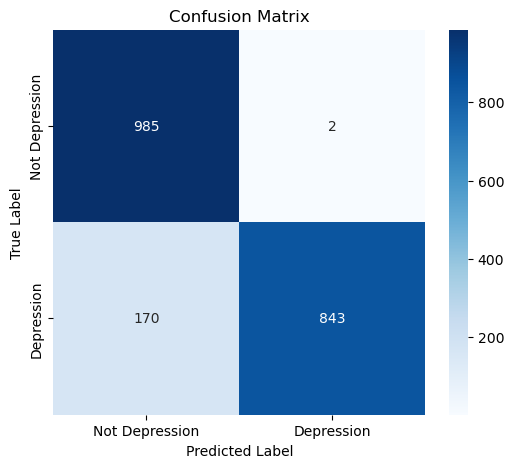

In [13]:
# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Depression", "Depression"], yticklabels=["Not Depression", "Depression"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()